## WEEK 2 TITANIC MACHINE LEARNING FROM DISASTER <br><br>

<img src="titanic.jpeg" alt="Alt Text" width="500" height="300">


### Overview
- On April 1912, it was the last day for titanic.<br>
- Over 1500 out of 2200 people were killed because of shortage of life boats on the ship.<br>
- Through this EDA we will check if it was only luck by which people survived or there were certain group of people who were rescued first.<br>


### Data Description
- Passenger ID : Unique ID for each passenger
- Survived : This is our target variable, and it means whether the passenger survived or killed in accident
- PClass : Class of passenger
- Name : Name of Passenger
- Sex : Gender of Passenger
- Age : Age of Passenger in years
- SibSp : number of siblings / spouses aboard the Titanic
- Parch : number of parents / children aboard the Titanic
- ticket : Ticket number
- Fare : Price of ticket
- Cabin : The cabins to which passenger has access to
- Embarked : Location from which Passenger joined the ship (C = Cherbourg, Q = Queenstown, S = Southampton)

### Flowchart:

Importing Required Libraries <b>></b><br> 
Checking description, shape, information of the dataset <b>></b><br> 
Checking for duplicate and null values <b>></b> <br> 
Checking value counts for required columns <b>></b><br>
Imputing the null values <b>></b>  
Feature Engineering if required <b>></b> 
<br>Univariate Visualisation <b>></b> <br> 
Bivariate Visualization  <b>></b><br>
Key Takeaways

<img src="flowchart.jpeg" alt="Alt Text" width="500" height="300">



### Pseudo Code
- Load the dataset into a Pandas DataFrame and checking basic attributes
- Check for missing values and handle them if necessary
- Checking unique values for variables
- Feature Engineering for columns
- Explore the distribution of each variable using histograms or boxplots (Univariate)
- Visualize relationships between variables using scatter plots or heatmaps (Bivariate)
- Summarize the findings and draw conclusions based on the results

In [1]:
#importing required libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the dataset and reading first few rows
df = pd.read_csv('train.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#checking shape of the dataset
df.shape

(891, 12)

- We have total of 891 records in our dataset with 12 features.

In [4]:
#checking datatypes of different columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#datatypes of variables
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
#checking description of data
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#checking the count of duplicate values
df.duplicated().sum()

0

- There are no duplicates present in our dataset

In [8]:
#checking for null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- Age, Cabin and Embarked variables have null values

In [9]:
#Checking the value counts of column with null values
df['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

- There are different number of cabin to which people were having access to and 687 people had no access

In [10]:
df['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

- Most people at ship were having age of 24 years.

In [11]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

- Most People started journey from Southampton.

### Imputing null values

In [12]:
#imputing the null values in age and fare with mean and with 0 in Cabin
df['Age'].fillna(value=df['Age'].mean(), inplace=True)
df['Cabin'].fillna(value=0, inplace=True)
df['Embarked'].fillna(value='S', inplace=True)

In [13]:
#checking the null values again
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [14]:
#Checking if cabin has values 0 in it
df['Cabin'].value_counts()

0              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

- 687 people had access to no cabin

In [15]:
#unique values in each feature
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          148
Embarked         3
dtype: int64

In [16]:
#we can get a new feature to count number of cabins person is allowed into
#defining function for cabin_access
def cabin_access(text):
    if text == 0:
        return 0
    else:
        cabins = len(text.split())
        return cabins
df['Cabin_Access'] = df['Cabin'].apply(cabin_access)
df.Cabin_Access.value_counts()

0    687
1    180
2     16
3      6
4      2
Name: Cabin_Access, dtype: int64

- 687 people had access to no cabins
- 8 people had access to 3 or more cabins

In [17]:
df['Cabin_Access'].head()

0    0
1    1
2    0
3    1
4    0
Name: Cabin_Access, dtype: int64

### Data visualisation

### Univariate analysis

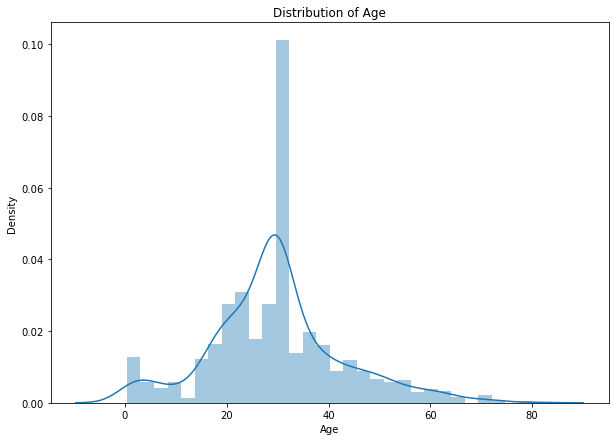

In [18]:
#Age column distribution
plt.figure(figsize=(10,7))
sns.distplot(df['Age'])
plt.title('Distribution of Age')
plt.show()

- Majority of people had age between 20-40.

In [19]:
#Binning the age column to change it to categorical and visualize it
bins = [0, 18, 45, 100]
labels = ['child', 'middle-aged', 'old']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

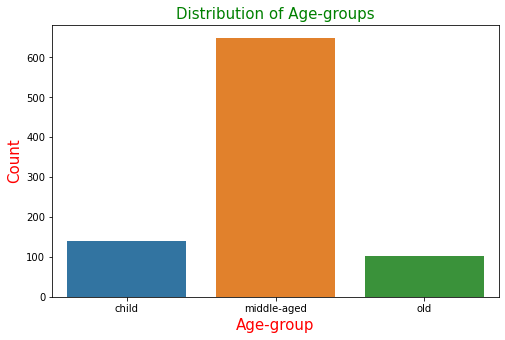

In [20]:
#Checking number of people in each agegroup
plt.figure(figsize=(8,5))
sns.barplot(x=df['Age_Group'].value_counts().keys(),y=df['Age_Group'].value_counts().values)
plt.title('Distribution of Age-groups',fontdict={'color':'green','size':'15'})
plt.ylabel('Count',fontdict={'color':'red','size':'15'})
plt.xlabel('Age-group',fontdict={'color':'red','size':'15'})
plt.show()

- Most people were having age between 18-45
- There were almost same number of children and senior citizens on board.

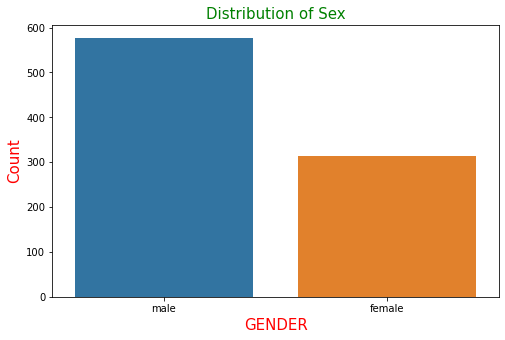

In [21]:
#Value_counts of Gender
plt.figure(figsize=(8,5))
sns.barplot(x=df['Sex'].value_counts().keys(),y=df['Sex'].value_counts().values)
plt.title('Distribution of Sex',fontdict={'color':'green','size':'15'})
plt.ylabel('Count',fontdict={'color':'red','size':'15'})
plt.xlabel('GENDER',fontdict={'color':'red','size':'15'})
plt.show()

- There were more male as compared to female on board.

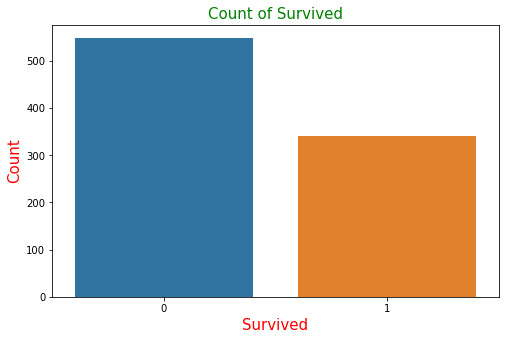

In [22]:
#Value_counts of Survived
plt.figure(figsize=(8,5))
sns.barplot(x=df['Survived'].value_counts().keys(),y=df['Survived'].value_counts().values)
plt.title('Count of Survived',fontdict={'color':'green','size':'15'})
plt.ylabel('Count',fontdict={'color':'red','size':'15'})
plt.xlabel('Survived',fontdict={'color':'red','size':'15'})
plt.show()

- Most of the people on board didn't survived

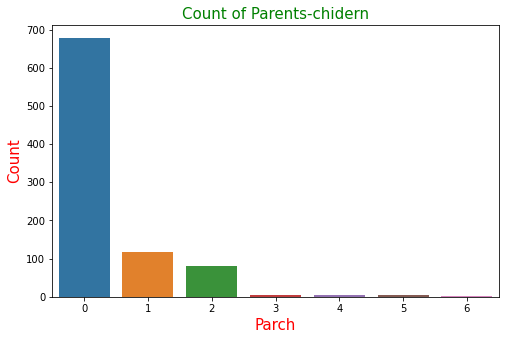

In [23]:
#Value_counts of Parch
plt.figure(figsize=(8,5))
sns.barplot(x=df['Parch'].value_counts().keys(),y=df['Parch'].value_counts().values)
plt.title('Count of Parents-chidern',fontdict={'color':'green','size':'15'})
plt.ylabel('Count',fontdict={'color':'red','size':'15'})
plt.xlabel('Parch',fontdict={'color':'red','size':'15'})
plt.show()

- Most people were without parents or children

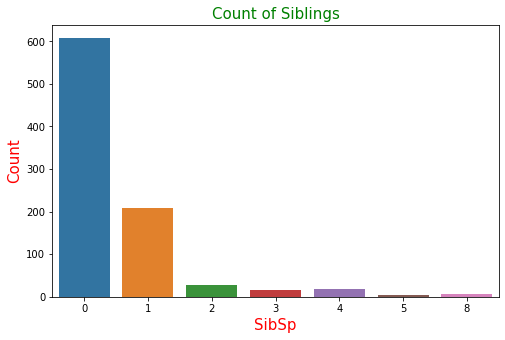

In [24]:
#Value_counts of Siblings
plt.figure(figsize=(8,5))
sns.barplot(x=df['SibSp'].value_counts().keys(),y=df['SibSp'].value_counts().values)
plt.title('Count of Siblings',fontdict={'color':'green','size':'15'})
plt.ylabel('Count',fontdict={'color':'red','size':'15'})
plt.xlabel('SibSp',fontdict={'color':'red','size':'15'})
plt.show()

- Most people were without siblings
- Over 200 people had atleast 1 sibling with them on board.

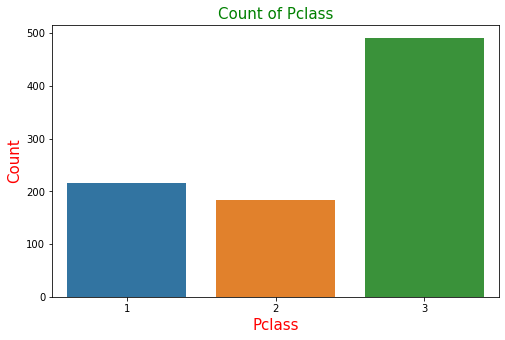

In [25]:
#Value_counts of Pclass
plt.figure(figsize=(8,5))
sns.barplot(x=df['Pclass'].value_counts().keys(),y=df['Pclass'].value_counts().values)
plt.title('Count of Pclass',fontdict={'color':'green','size':'15'})
plt.ylabel('Count',fontdict={'color':'red','size':'15'})
plt.xlabel('Pclass',fontdict={'color':'red','size':'15'})
plt.show()

- There were nearly 500 people in 3rd Class category.

In [26]:
#Replacing abbrevatives in embarked feature for better visualisation
df['Embarked'] = df['Embarked'].replace({'S': 'Southampton', 'C': 'Cherbourg', 'Q':'Queenstown'})

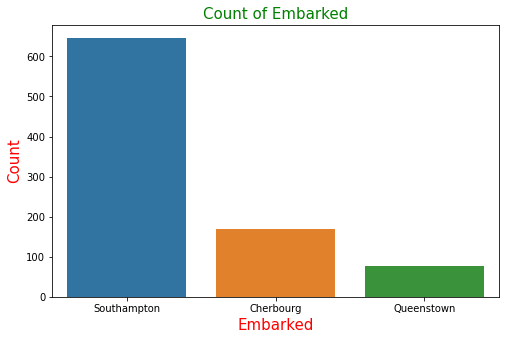

In [27]:
#Value_counts of Embarked
plt.figure(figsize=(8,5))
sns.barplot(x=df['Embarked'].value_counts().keys(),y=df['Embarked'].value_counts().values)
plt.title('Count of Embarked',fontdict={'color':'green','size':'15'})
plt.ylabel('Count',fontdict={'color':'red','size':'15'})
plt.xlabel('Embarked',fontdict={'color':'red','size':'15'})
plt.show()

- Majority of people boarded from Southampton and least from Queenstown.

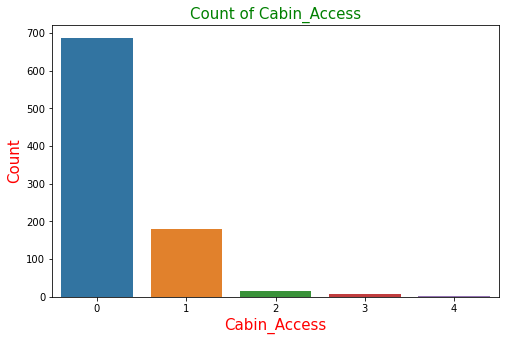

In [28]:
#Value_counts of Cabin Access
plt.figure(figsize=(8,5))
sns.barplot(x=df['Cabin_Access'].value_counts().keys(),y=df['Cabin_Access'].value_counts().values)
plt.title('Count of Cabin_Access',fontdict={'color':'green','size':'15'})
plt.ylabel('Count',fontdict={'color':'red','size':'15'})
plt.xlabel('Cabin_Access',fontdict={'color':'red','size':'15'})
plt.show()

In [29]:
#fetching out titles from names
df['Title'] = df.Name.apply(lambda x : x.split(',')[1].split('.')[0].strip())
df['Title'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

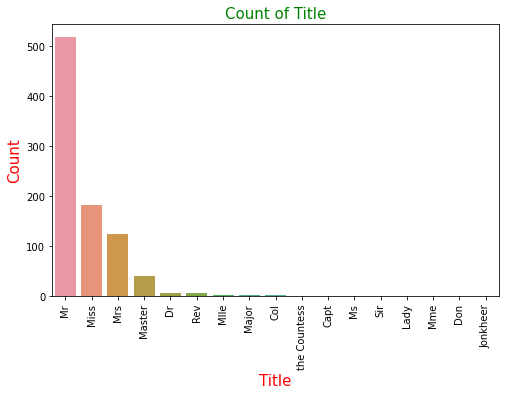

In [30]:
#Value_counts of Title
plt.figure(figsize=(8,5))
sns.barplot(x=df['Title'].value_counts().keys(),y=df['Title'].value_counts().values)
plt.title('Count of Title',fontdict={'color':'green','size':'15'})
plt.ylabel('Count',fontdict={'color':'red','size':'15'})
plt.xlabel('Title',fontdict={'color':'red','size':'15'})
plt.xticks(rotation = 90)
plt.show()

- Most of the people on board had Mr as title.
- There were Different background people on board like doctor, major, don, captain.

### Bivariate Analysis

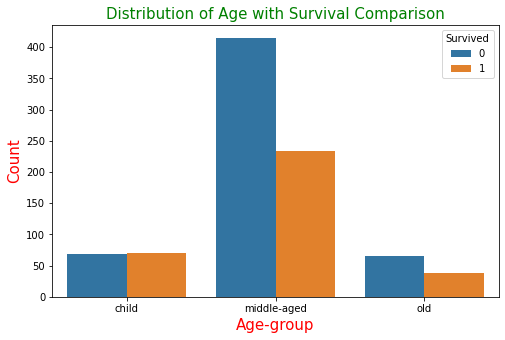

In [31]:
#Distribution of Age with Survival Comparison
plt.figure(figsize=(8,5))
sns.countplot(x=df['Age_Group'],hue=df['Survived'])
plt.title('Distribution of Age with Survival Comparison',fontdict={'color':'green','size':'15'})
plt.ylabel('Count',fontdict={'color':'red','size':'15'})
plt.xlabel('Age-group',fontdict={'color':'red','size':'15'})
plt.show()

- The survival rate for child were almost 50-50.
- More number of middle-aged and old people didn't survived.

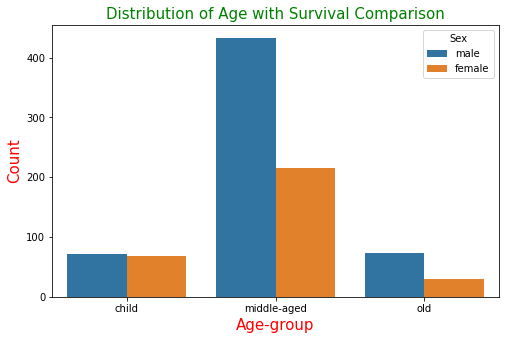

In [32]:
#Distribution of Age with Gender Comparison
plt.figure(figsize=(8,5))
sns.countplot(x=df['Age_Group'],hue=df['Sex'])
plt.title('Distribution of Age with Survival Comparison',fontdict={'color':'green','size':'15'})
plt.ylabel('Count',fontdict={'color':'red','size':'15'})
plt.xlabel('Age-group',fontdict={'color':'red','size':'15'})
plt.show()

- There were almost equal number of male and female children.

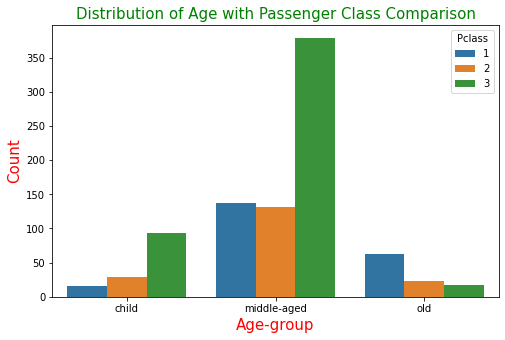

In [33]:
#Distribution of Age with Passenger Class Comparison
plt.figure(figsize=(8,5))
sns.countplot(x=df['Age_Group'],hue=df['Pclass'])
plt.title('Distribution of Age with Passenger Class Comparison',fontdict={'color':'green','size':'15'})
plt.ylabel('Count',fontdict={'color':'red','size':'15'})
plt.xlabel('Age-group',fontdict={'color':'red','size':'15'})
plt.show()

- Number of 1st class people in old age group is high

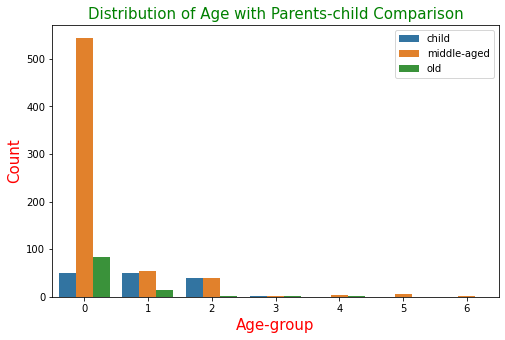

In [34]:
#Distribution of Age with Gender Comparison
plt.figure(figsize=(8,5))
sns.countplot(x=df['Parch'],hue=df['Age_Group'])
plt.title('Distribution of Age with Parents-child Comparison',fontdict={'color':'green','size':'15'})
plt.ylabel('Count',fontdict={'color':'red','size':'15'})
plt.xlabel('Age-group',fontdict={'color':'red','size':'15'})
plt.legend(loc='upper right')
plt.show()

- People with no parents children are mostly middle-aged.

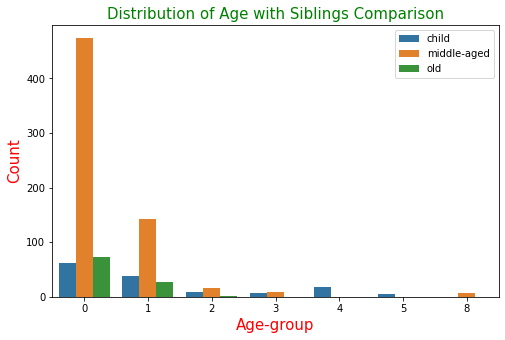

In [35]:
#Distribution of Age with Gender Comparison
plt.figure(figsize=(8,5))
sns.countplot(x=df['SibSp'],hue=df['Age_Group'])
plt.title('Distribution of Age with Siblings Comparison',fontdict={'color':'green','size':'15'})
plt.ylabel('Count',fontdict={'color':'red','size':'15'})
plt.xlabel('Age-group',fontdict={'color':'red','size':'15'})
plt.legend(loc='upper right')
plt.show()

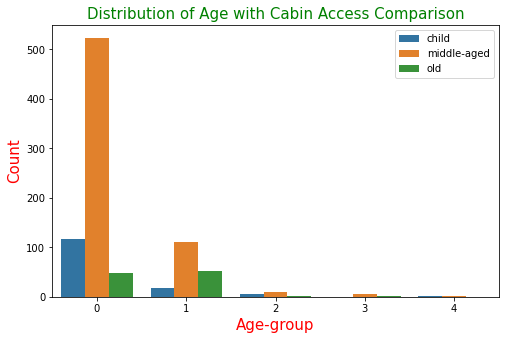

In [36]:
#Distribution of Age with Cabin access Comparison
plt.figure(figsize=(8,5))
sns.countplot(x=df['Cabin_Access'],hue=df['Age_Group'])
plt.title('Distribution of Age with Cabin Access Comparison',fontdict={'color':'green','size':'15'})
plt.ylabel('Count',fontdict={'color':'red','size':'15'})
plt.xlabel('Age-group',fontdict={'color':'red','size':'15'})
plt.legend(loc='upper right')
plt.show()

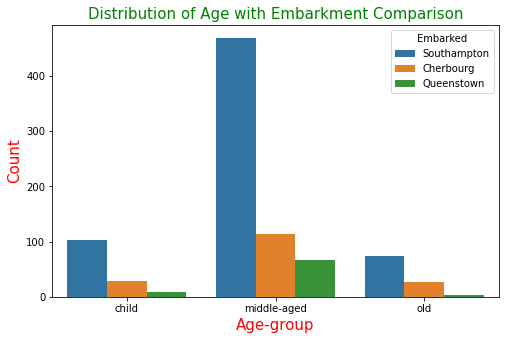

In [37]:
#Distribution of Age with Embarkment Comparison
plt.figure(figsize=(8,5))
sns.countplot(x=df['Age_Group'],hue=df['Embarked'])
plt.title('Distribution of Age with Embarkment Comparison',fontdict={'color':'green','size':'15'})
plt.ylabel('Count',fontdict={'color':'red','size':'15'})
plt.xlabel('Age-group',fontdict={'color':'red','size':'15'})
plt.show()

- There age distribution has no impact on where people boarded from.

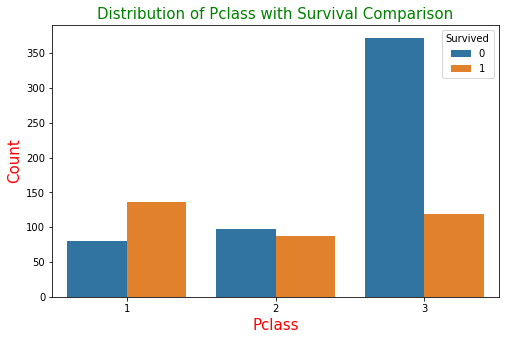

In [38]:
#Distribution of Pclass with Survival Comparison
plt.figure(figsize=(8,5))
sns.countplot(x=df['Pclass'],hue=df['Survived'])
plt.title('Distribution of Pclass with Survival Comparison',fontdict={'color':'green','size':'15'})
plt.ylabel('Count',fontdict={'color':'red','size':'15'})
plt.xlabel('Pclass',fontdict={'color':'red','size':'15'})
plt.show()

- As the class of pessenger reduces the chances of surviving reduced.

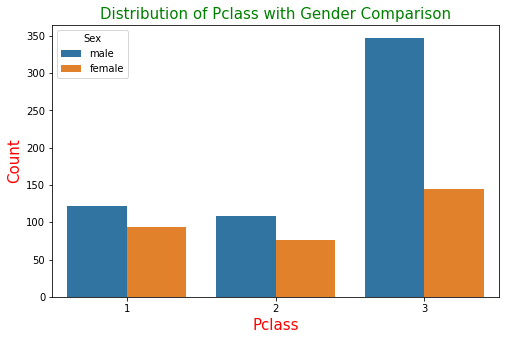

In [39]:
#Distribution of Pclass with Gender Comparison
plt.figure(figsize=(8,5))
sns.countplot(x=df['Pclass'],hue=df['Sex'])
plt.title('Distribution of Pclass with Gender Comparison',fontdict={'color':'green','size':'15'})
plt.ylabel('Count',fontdict={'color':'red','size':'15'})
plt.xlabel('Pclass',fontdict={'color':'red','size':'15'})
plt.show()

- Class 1 and 2 has better gender ratio as compared to 3rd class

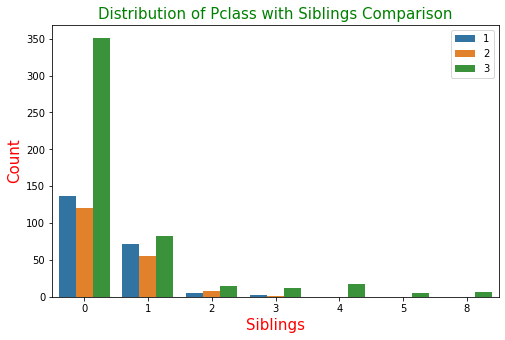

In [40]:
#Distribution of Pclass with Sibling Comparison
plt.figure(figsize=(8,5))
sns.countplot(x=df['SibSp'],hue=df['Pclass'])
plt.title('Distribution of Pclass with Siblings Comparison',fontdict={'color':'green','size':'15'})
plt.ylabel('Count',fontdict={'color':'red','size':'15'})
plt.xlabel('Siblings',fontdict={'color':'red','size':'15'})
plt.legend(loc='upper right')
plt.show()

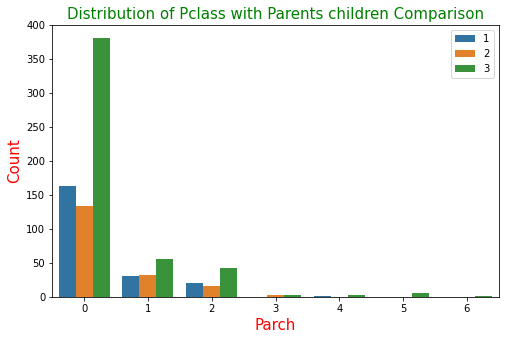

In [41]:
#Distribution of Pclass with Parents children Comparison
plt.figure(figsize=(8,5))
sns.countplot(x=df['Parch'],hue=df['Pclass'])
plt.title('Distribution of Pclass with Parents children Comparison',fontdict={'color':'green','size':'15'})
plt.ylabel('Count',fontdict={'color':'red','size':'15'})
plt.xlabel('Parch',fontdict={'color':'red','size':'15'})
plt.legend(loc='upper right')
plt.show()

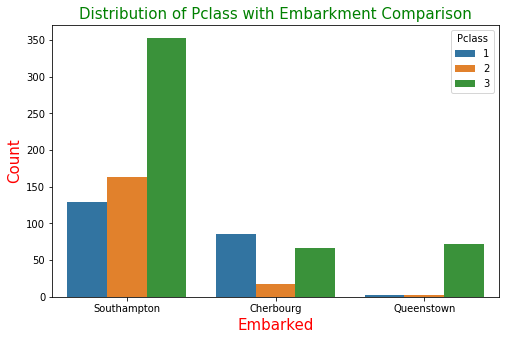

In [42]:
#Distribution of Pclass with Survival Comparison
plt.figure(figsize=(8,5))
sns.countplot(x=df['Embarked'],hue=df['Pclass'])
plt.title('Distribution of Pclass with Embarkment Comparison',fontdict={'color':'green','size':'15'})
plt.ylabel('Count',fontdict={'color':'red','size':'15'})
plt.xlabel('Embarked',fontdict={'color':'red','size':'15'})
plt.show()

- Ratio of first class pessengers fro Cherbourg is higher as compared to other embarkments.

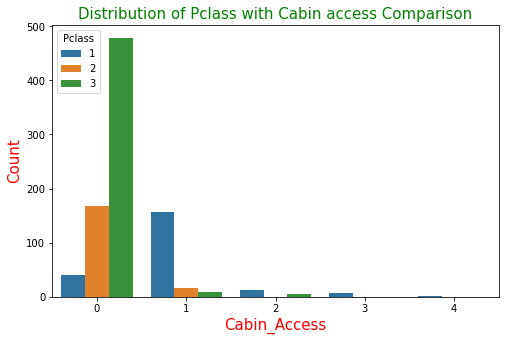

In [43]:
#Distribution of Pclass with cabin access Comparison
plt.figure(figsize=(8,5))
sns.countplot(x=df['Cabin_Access'],hue=df['Pclass'])
plt.title('Distribution of Pclass with Cabin access Comparison',fontdict={'color':'green','size':'15'})
plt.ylabel('Count',fontdict={'color':'red','size':'15'})
plt.xlabel('Cabin_Access',fontdict={'color':'red','size':'15'})
plt.show()

- Most 3rd class people had access to no cabin
- First class pessengers had access to one cabin

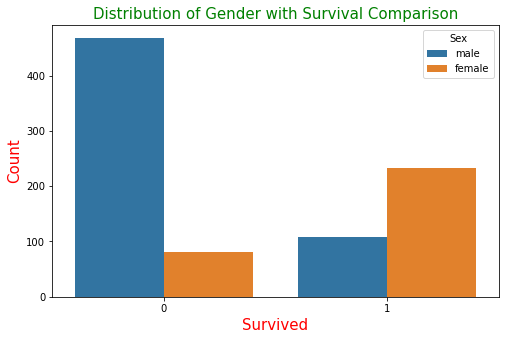

In [44]:
#Distribution of Survived with Gender Comparison
plt.figure(figsize=(8,5))
sns.countplot(x=df['Survived'],hue=df['Sex'])
plt.title('Distribution of Gender with Survival Comparison',fontdict={'color':'green','size':'15'})
plt.ylabel('Count',fontdict={'color':'red','size':'15'})
plt.xlabel('Survived',fontdict={'color':'red','size':'15'})
plt.show()

- Females survived more as compared to male.

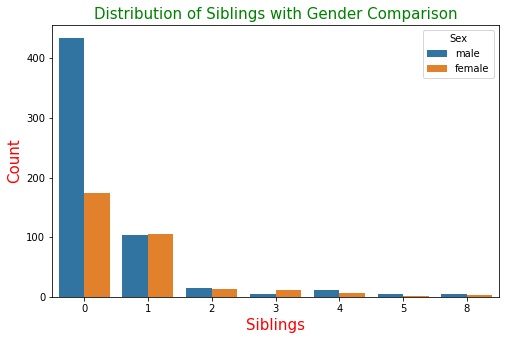

In [45]:
#Distribution of Siblings with Gender Comparison
plt.figure(figsize=(8,5))
sns.countplot(x=df['SibSp'],hue=df['Sex'])
plt.title('Distribution of Siblings with Gender Comparison',fontdict={'color':'green','size':'15'})
plt.ylabel('Count',fontdict={'color':'red','size':'15'})
plt.xlabel('Siblings',fontdict={'color':'red','size':'15'})
plt.show()

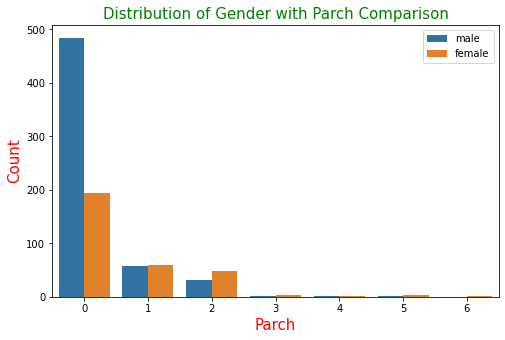

In [46]:
#Distribution of Gender with Parch Comparison
plt.figure(figsize=(8,5))
sns.countplot(x=df['Parch'],hue=df['Sex'])
plt.title('Distribution of Gender with Parch Comparison',fontdict={'color':'green','size':'15'})
plt.ylabel('Count',fontdict={'color':'red','size':'15'})
plt.xlabel('Parch',fontdict={'color':'red','size':'15'})
plt.legend(loc='upper right')
plt.show()

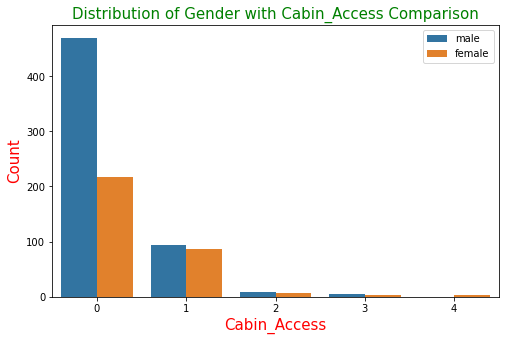

In [47]:
#Distribution of Gender with Pclass Comparison
plt.figure(figsize=(8,5))
sns.countplot(x=df['Cabin_Access'],hue=df['Sex'])
plt.title('Distribution of Gender with Cabin_Access Comparison',fontdict={'color':'green','size':'15'})
plt.ylabel('Count',fontdict={'color':'red','size':'15'})
plt.xlabel('Cabin_Access',fontdict={'color':'red','size':'15'})
plt.legend(loc='upper right')
plt.show()

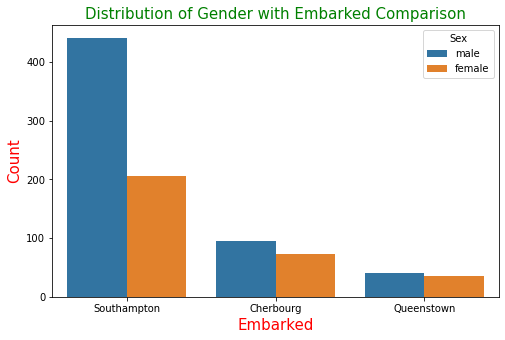

In [48]:
#Distribution of Gender with Embarked Comparison
plt.figure(figsize=(8,5))
sns.countplot(x=df['Embarked'],hue=df['Sex'])
plt.title('Distribution of Gender with Embarked Comparison',fontdict={'color':'green','size':'15'})
plt.ylabel('Count',fontdict={'color':'red','size':'15'})
plt.xlabel('Embarked',fontdict={'color':'red','size':'15'})
plt.show()

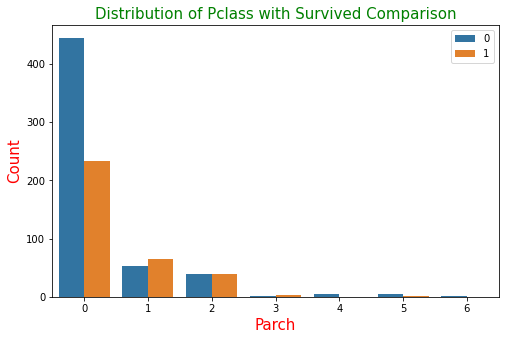

In [49]:
#Distribution of Parch with Survived Comparison
plt.figure(figsize=(8,5))
sns.countplot(x=df['Parch'],hue=df['Survived'])
plt.title('Distribution of Pclass with Survived Comparison',fontdict={'color':'green','size':'15'})
plt.ylabel('Count',fontdict={'color':'red','size':'15'})
plt.xlabel('Parch',fontdict={'color':'red','size':'15'})
plt.legend(loc='upper right')
plt.show()

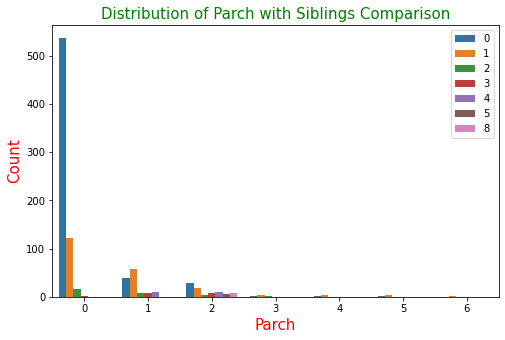

In [50]:
#Distribution of Parch with Siblings Comparison
plt.figure(figsize=(8,5))
sns.countplot(x=df['Parch'],hue=df['SibSp'])
plt.title('Distribution of Parch with Siblings Comparison',fontdict={'color':'green','size':'15'})
plt.ylabel('Count',fontdict={'color':'red','size':'15'})
plt.xlabel('Parch',fontdict={'color':'red','size':'15'})
plt.legend(loc='upper right')
plt.show()

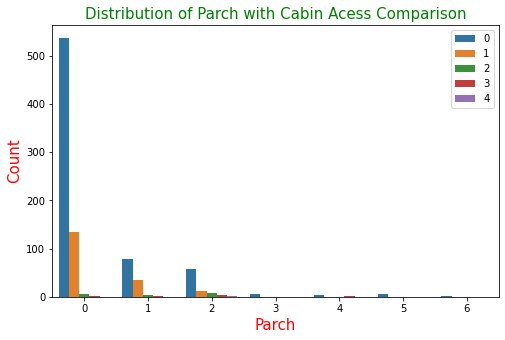

In [51]:
#Distribution of Parch with Class Comparison
plt.figure(figsize=(8,5))
sns.countplot(x=df['Parch'],hue=df['Cabin_Access'])
plt.title('Distribution of Parch with Cabin Acess Comparison',fontdict={'color':'green','size':'15'})
plt.ylabel('Count',fontdict={'color':'red','size':'15'})
plt.xlabel('Parch',fontdict={'color':'red','size':'15'})
plt.legend(loc='upper right')
plt.show()

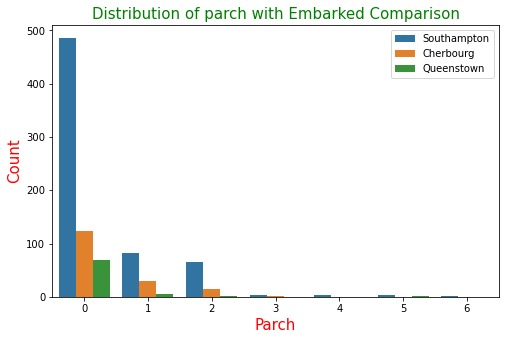

In [52]:
#Distribution of Prach with Embarked Comparison
plt.figure(figsize=(8,5))
sns.countplot(x=df['Parch'],hue=df['Embarked'])
plt.title('Distribution of parch with Embarked Comparison',fontdict={'color':'green','size':'15'})
plt.ylabel('Count',fontdict={'color':'red','size':'15'})
plt.xlabel('Parch',fontdict={'color':'red','size':'15'})
plt.legend(loc='upper right')
plt.show()

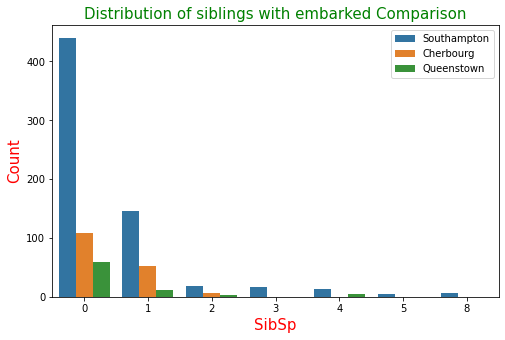

In [53]:
#Distribution of siblings with embarked Comparison
plt.figure(figsize=(8,5))
sns.countplot(x=df['SibSp'],hue=df['Embarked'])
plt.title('Distribution of siblings with embarked Comparison',fontdict={'color':'green','size':'15'})
plt.ylabel('Count',fontdict={'color':'red','size':'15'})
plt.xlabel('SibSp',fontdict={'color':'red','size':'15'})
plt.legend(loc='upper right')
plt.show()

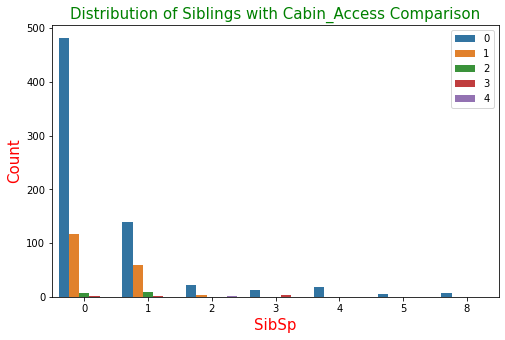

In [54]:
#Distribution of sibling with Cabin_Access Comparison
plt.figure(figsize=(8,5))
sns.countplot(x=df['SibSp'],hue=df['Cabin_Access'])
plt.title('Distribution of Siblings with Cabin_Access Comparison',fontdict={'color':'green','size':'15'})
plt.ylabel('Count',fontdict={'color':'red','size':'15'})
plt.xlabel('SibSp',fontdict={'color':'red','size':'15'})
plt.legend(loc='upper right')
plt.show()

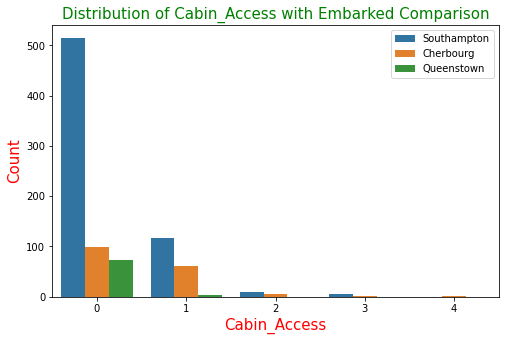

In [55]:
#Distribution of Cabin_Access with Embarked Comparison
plt.figure(figsize=(8,5))
sns.countplot(x=df['Cabin_Access'],hue=df['Embarked'])
plt.title('Distribution of Cabin_Access with Embarked Comparison',fontdict={'color':'green','size':'15'})
plt.ylabel('Count',fontdict={'color':'red','size':'15'})
plt.xlabel('Cabin_Access',fontdict={'color':'red','size':'15'})
plt.legend(loc='upper right')
plt.show()

In [56]:
#Fetching the numerical features
df_num = df[['Age','Fare','SibSp','Parch','Cabin_Access']]
df_num.head()

,Age,Fare,SibSp,Parch,Cabin_Access
0,22.0,7.2500,1,0,0
1,38.0,71.2833,1,0,1
2,26.0,7.9250,0,0,0
3,35.0,53.1000,1,0,1
4,35.0,8.0500,0,0,0


In [57]:
#Checking correlation for numerical features
df_num.corr()

,Age,Fare,SibSp,Parch,Cabin_Access
Age,1.000000,0.091566,-0.232625,-0.179191,0.164410
Fare,0.091566,1.000000,0.159651,0.216225,0.596171
SibSp,-0.232625,0.159651,1.000000,0.414838,0.012150
Parch,-0.179191,0.216225,0.414838,1.000000,0.127846
Cabin_Access,0.164410,0.596171,0.012150,0.127846,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

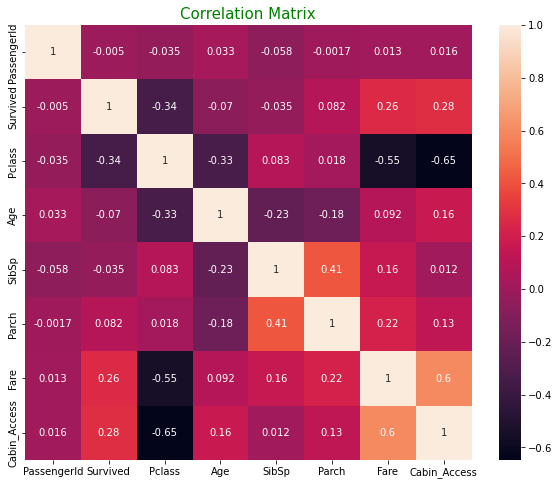

In [58]:
#Plotting heatmap to check correlation in numerical features

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Matrix',fontdict={'color':'green','size':'15'})

- There is no high correlation in the titanic dataset
- Class is having negative correlation with Fare and Cabin.
- Fare is having high correlation with Cabin_access

### Key Takeaways and conclusion:

- Class and gender has high impact on survival rate
- Old people mostly belong to first class
- Gender ratio is good in first class.
- Children gender ratio is also good.
- Most people belong to middle-age category.
- Most first class people embarked from Cherbourgh.
- More number of middle-aged and old people didn't survived.
- Most people boarded from southampton and belong to class 3.